In [38]:
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import os

#### Чтение и подготовка данных

In [39]:
dirname = os.path.join(os.path.abspath(os.curdir), 'data', 'underwork')

raw_data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}
for v in raw_data:
    tsdf_c = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    tsdf_w = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    raw_data[v] = (tsdf_c, tsdf_w, tsdf_m)

In [40]:
data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}

for v in raw_data:
    calm = raw_data[v][0]
    work = raw_data[v][1]
    sex = raw_data[v][2].iloc[0]["values"]
    weight = raw_data[v][2].iloc[1]["values"]
    height = raw_data[v][2].iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    data[v] = (calm, work)

In [41]:
validation = {"25":(), "27":()}
for v in validation:
    calm = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    work = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    sex = tsdf_m.iloc[0]["values"]
    weight = tsdf_m.iloc[1]["values"]
    height = tsdf_m.iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    validation[v] = (calm, work)

In [42]:
ts = pd.DataFrame()

for v in data:
   calm = data[v][0]
   work = data[v][1]
   ts = pd.concat([ts, calm, work], sort=False, axis=0)

In [43]:
ts = pd.DataFrame()

for v in data:
   calm = data[v][0]
   work = data[v][1]
   ts = pd.concat([ts, calm, work], sort=False, axis=0)

In [44]:
ts.index = np.arange(len(ts.index))
ts.index = pd.to_datetime(ts.index)
sec = 1000000000
delta = pd.to_datetime(2 * sec) - pd.to_datetime(sec)
times = [pd.to_datetime(sec)]
for i in range(1, len(ts.index)):
    times += [times[i - 1] + delta]
ts.index = times

In [45]:
ts

,Time,1,2,3,4,5,6,sex,weight,height,state
1970-01-01 00:00:01,10.000,1.578218,0.056370,-0.400067,1.629020,2.085490,-0.171848,0.0,76.0,187.0,0
1970-01-01 00:00:02,10.001,1.578611,0.063821,-0.393400,1.626275,2.083529,-0.164398,0.0,76.0,187.0,0
1970-01-01 00:00:03,10.002,1.579003,0.072447,-0.385558,1.623137,2.081176,-0.156555,0.0,76.0,187.0,0
1970-01-01 00:00:04,10.003,1.579003,0.081859,-0.376539,1.620000,2.078039,-0.147144,0.0,76.0,187.0,0
1970-01-01 00:00:05,10.004,1.579003,0.090093,-0.368304,1.617255,2.075294,-0.138909,0.0,76.0,187.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1970-01-08 18:06:36,59.995,1.629587,-0.226354,-0.785920,1.689020,2.248235,-0.505941,0.0,110.0,175.0,1
1970-01-08 18:06:37,59.996,1.629587,-0.226354,-0.785920,1.689020,2.248235,-0.505941,0.0,110.0,175.0,1
1970-01-08 18:06:38,59.997,1.629587,-0.225962,-0.785136,1.689020,2.247843,-0.505549,0.0,110.0,175.0,1
1970-01-08 18:06:39,59.998,1.628803,-0.225962,-0.783960,1.689412,2.247059,-0.504765,0.0,110.0,175.0,1


In [46]:
pdts_data = PandasDataset(ts, freq='S', target='1')
test_size = 5000
train, test = split(pdts_data, offset=-test_size)

In [47]:
train, test

(TrainingDataset(dataset=PandasDataset<size=1, freq=S, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>, splitter=OffsetSplitter(offset=-5000)),
 TestTemplate(dataset=PandasDataset<size=1, freq=S, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>, splitter=OffsetSplitter(offset=-5000)))

#### Создание и обучение модели

In [48]:
EPOCHS = 5
model = DeepAREstimator(freq='S', prediction_length=test_size, trainer_kwargs={'max_epochs':EPOCHS})

In [49]:
predictor = model.train(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\urban\OneDrive\Рабочий стол\timeseries_homework\venv\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                           | Out sizes     
----------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.1 K | [[1, 1], [1, 1], [1, 5181, 7], [1, 5181], [1, 5181], [1, 5000, 7]] | [1, 100, 5000]
----------------------------------------------------------------------------------------------------------------------------
25.1 K    Trainable params
0         Non-trainable params
25.1 K    Total params
0.100     Total estimated model params size (MB)


Epoch 0: |          | 50/? [16:37<00:00,  0.05it/s, v_num=3, train_loss=0.617]

Epoch 0, global step 50: 'train_loss' reached 0.61695 (best 0.61695), saving model to 'c:\\Users\\urban\\OneDrive\\Рабочий стол\\timeseries_homework\\timeseries_homeworks\\homework_12 (Lecture 13)\\lightning_logs\\version_3\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 0/? [00:00<?, ?it/s, v_num=3, train_loss=0.617]         

c:\Users\urban\OneDrive\Рабочий стол\timeseries_homework\venv\lib\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


#### Предсказания и отрисовка

In [50]:
test = test.generate_instances(prediction_length = test_size, windows=1)
forecast = list(predictor.predict(test.input))

1


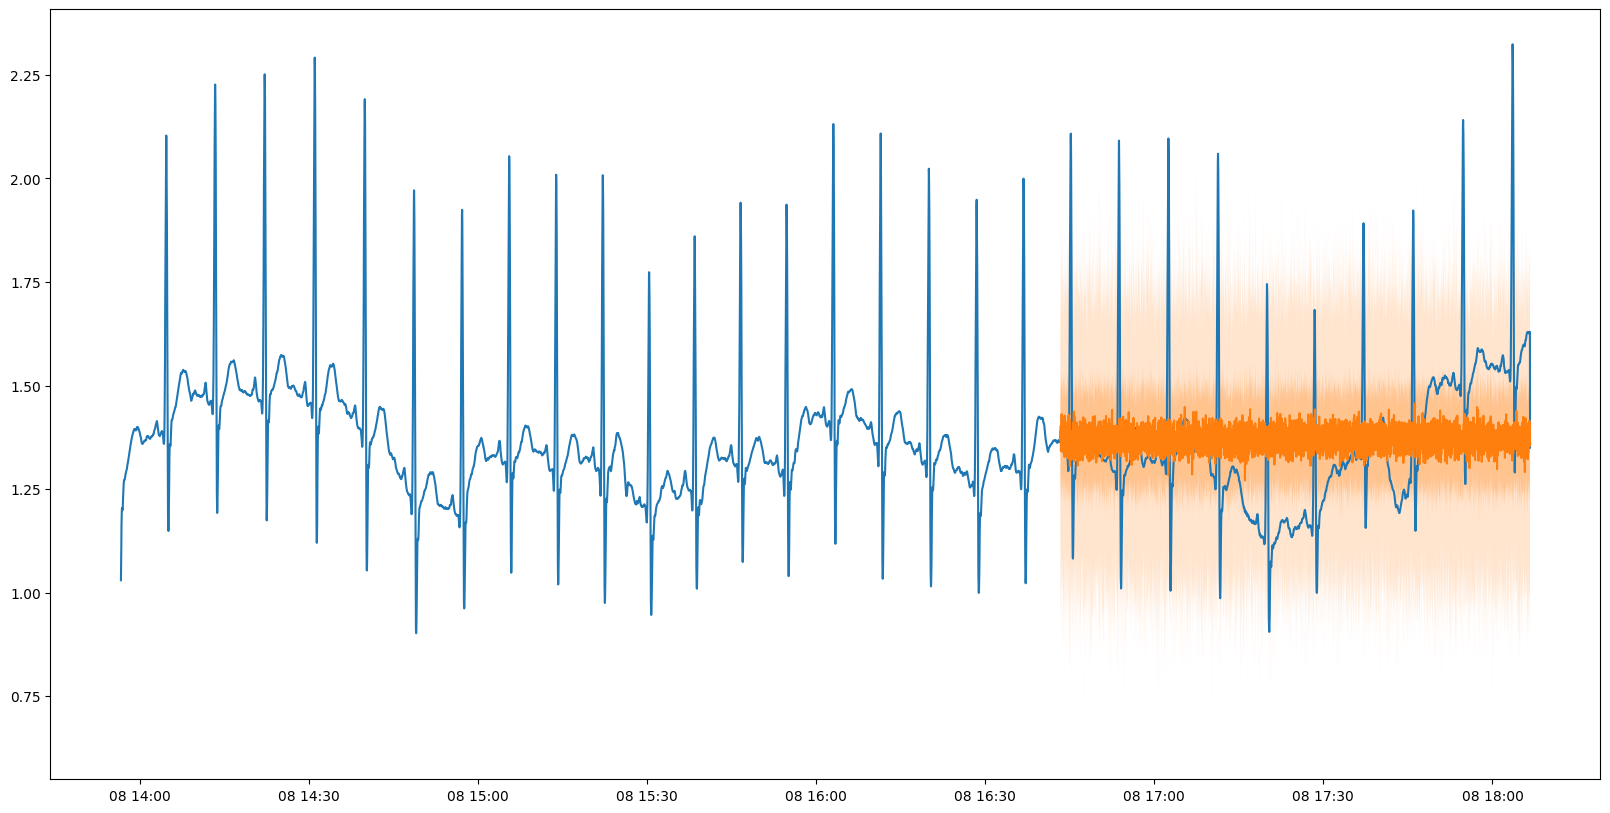

In [51]:
plt.figure(figsize=(20,10))
print(len(forecast))
plt.plot(ts['1'][len(ts['1']) - 3 * test_size:len(ts['1'])])
for fore in forecast:
    fore.plot()